<a href="https://colab.research.google.com/github/MUYIWILSON/web-scrape-with-Pandas/blob/main/Copy_of_web_scrapping_with_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*INTRODUCTION*
The project aims to analyze the largest companies in Canada based on the Forbes list of 2019. Using web scraping and pandas, data about Canadian companies will be collected and analyzed. The analysis will focus on financial metrics, including revenue, profit, assets, and industry-specific data. Financial ratios like profit margin and asset turnover will be calculated to assess the companies' financial health. Visualizations such as scatter plots and heatmaps will be used to identify correlations between different financial metrics. The project will provide valuable insights into the performance and position of the top Canadian companies, benefiting investors, policymakers, and business enthusiasts. Additionally, it will serve as a learning experience for data analysts and aspiring data scientists on using web scraping and pandas for data analysis.
The issues involved in the analysis can be formulated as follows:

What is the financial performance of the companies in the dataset in terms of revenue, profits, assets, and value?
What key financial metrics (e.g. profit margins, asset turnover) can be calculated to assess a company's financial health?
Which industries have the highest sales, profits and assets?
Are there any notable trends or changes in rankings, revenue, profits, or other metrics over time?
According to the Forbes 2000, which companies top the list? How do their financial metrics compare to other companies?
Is there a correlation between Forbes 2000 rankings and financial metrics like sales, profits, wealth and value?
Which industries or companies experienced significant growth or decline during the analyzed period?
Based on the analysis, what actionable recommendations can be made to improve business performance or address financial challenges?

import the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Get the url and scrape the data from web

In [ ]:
url = 'https://en.wikipedia.org/wiki/List_of_largest_companies_in_Canada#See_also'

In [ ]:
tables = pd.read_html(url)

In [ ]:
len(tables)

2

#Analyze and select desire DataFrames from the list

In [ ]:
tables[1]

,Rank,Forbes 2000 rank,Name,Headquarters,Revenue (billions US$),Profit (billions US$),Assets (billions US$),Value (billions US$),Industry
0,1,41,Royal Bank of Canada,Toronto,46.3,9.6,1040.3,114.9,Banking
1,2,46,Toronto-Dominion Bank,Toronto,42.5,8.7,1007.0,103.8,Banking
2,3,87,Scotiabank,Toronto,32.4,6.4,787.5,67.1,Banking
3,4,118,Brookfield Asset Management,Toronto,57.6,3.6,256.3,46.0,Finance
4,5,134,Bank of Montreal,Montreal,26.2,4.6,614.2,50.4,Banking
5,6,166,Manulife,Toronto,28.4,3.7,517.8,36.2,Insurance
6,7,174,Enbridge,Calgary,36.1,2.2,122.2,75.3,Oil and Gas
7,8,190,Canadian Imperial Bank of Commerce,Toronto,20.2,3.9,486.0,36.8,Banking
8,9,229,Suncor Energy,Calgary,29.7,2.5,65.6,52.6,Oil and Gas
9,10,273,Sun Life Financial,Toronto,23.4,2.0,196.0,24.5,Insurance


#STEP 1

#Examine the Structure of the Dataset

In [ ]:
df = tables[1]

In [ ]:
df.head()

,Rank,Company Name,Headquarters,Revenue (billions US$),Profit (billions US$),Assets (billions US$),Value (billions US$),Industry,Year
0,1,Royal Bank of Canada,Toronto,46.3,9.6,1040.3,114.9,Banking,2021-01-01
1,2,Toronto-Dominion Bank,Toronto,42.5,8.7,1007.0,103.8,Banking,2022-01-01
2,3,Scotiabank,Toronto,32.4,6.4,787.5,67.1,Banking,2023-01-01
3,4,Brookfield Asset Management,Toronto,57.6,3.6,256.3,46.0,Finance,2022-01-01
4,5,Bank of Montreal,Montreal,26.2,4.6,614.2,50.4,Banking,2023-01-01


In [ ]:
df.describe()

,Rank,Forbes 2000 rank,Revenue (billions US$),Assets (billions US$),Value (billions US$)
count,56.000000,56.000000,56.000000,56.000000,56.000000
mean,28.500000,911.821429,16.166071,119.278571,25.071429
std,16.309506,575.502029,14.478502,237.720952,23.724262
min,1.000000,41.000000,0.500000,1.800000,0.800000
25%,14.750000,382.000000,5.500000,15.925000,9.400000
50%,28.500000,935.500000,10.850000,25.450000,17.700000
75%,42.250000,1323.000000,21.000000,56.525000,32.650000
max,56.000000,1978.000000,59.700000,1040.300000,114.900000


In [ ]:
df.columns

Index(['Rank', 'Forbes 2000 rank', 'Name', 'Headquarters',
       'Revenue (billions US$)', 'Profit (billions US$)',
       'Assets (billions US$)', 'Value (billions US$)', 'Industry'],
      dtype='object')

In [ ]:
df.info

<bound method DataFrame.info of     Rank  Forbes 2000 rank                                Name Headquarters  \
0      1                41                Royal Bank of Canada      Toronto   
1      2                46               Toronto-Dominion Bank      Toronto   
2      3                87                          Scotiabank      Toronto   
3      4               118         Brookfield Asset Management      Toronto   
4      5               134                    Bank of Montreal     Montreal   
5      6               166                            Manulife      Toronto   
6      7               174                            Enbridge      Calgary   
7      8               190  Canadian Imperial Bank of Commerce      Toronto   
8      9               229                       Suncor Energy      Calgary   
9     10               273                  Sun Life Financial      Toronto   
10    11               341                         Bell Canada     Montreal   
11    12            

In [ ]:
df.nunique

<bound method DataFrame.nunique of     Rank  Forbes 2000 rank                                Name Headquarters  \
0      1                41                Royal Bank of Canada      Toronto   
1      2                46               Toronto-Dominion Bank      Toronto   
2      3                87                          Scotiabank      Toronto   
3      4               118         Brookfield Asset Management      Toronto   
4      5               134                    Bank of Montreal     Montreal   
5      6               166                            Manulife      Toronto   
6      7               174                            Enbridge      Calgary   
7      8               190  Canadian Imperial Bank of Commerce      Toronto   
8      9               229                       Suncor Energy      Calgary   
9     10               273                  Sun Life Financial      Toronto   
10    11               341                         Bell Canada     Montreal   
11    12         

In [ ]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
52    False
53    False
54    False
55    False
dtype: bool

In [ ]:
df.dtypes

Rank                        int64
Forbes 2000 rank            int64
Name                       object
Headquarters               object
Revenue (billions US$)    float64
Profit (billions US$)      object
Assets (billions US$)     float64
Value (billions US$)      float64
Industry                   object
dtype: object

In [ ]:
df.isnull

<bound method DataFrame.isnull of     Rank  Forbes 2000 rank                                Name Headquarters  \
0      1                41                Royal Bank of Canada      Toronto   
1      2                46               Toronto-Dominion Bank      Toronto   
2      3                87                          Scotiabank      Toronto   
3      4               118         Brookfield Asset Management      Toronto   
4      5               134                    Bank of Montreal     Montreal   
5      6               166                            Manulife      Toronto   
6      7               174                            Enbridge      Calgary   
7      8               190  Canadian Imperial Bank of Commerce      Toronto   
8      9               229                       Suncor Energy      Calgary   
9     10               273                  Sun Life Financial      Toronto   
10    11               341                         Bell Canada     Montreal   
11    12          

#STEP 2

#Performing Descriptives statistic on the Dataset

 Calculate descriptive statistics for numerical variables

In [ ]:
descriptive_stats = df[['Revenue (billions US$)', 'Profit (billions US$)', 'Assets (billions US$)', 'Value (billions US$)']].describe()
print(descriptive_stats)

       Revenue (billions US$)  Assets (billions US$)  Value (billions US$)
count               56.000000              56.000000             56.000000
mean                16.166071             119.278571             25.071429
std                 14.478502             237.720952             23.724262
min                  0.500000               1.800000              0.800000
25%                  5.500000              15.925000              9.400000
50%                 10.850000              25.450000             17.700000
75%                 21.000000              56.525000             32.650000
max                 59.700000            1040.300000            114.900000


# Visualize histograms for numerical variables

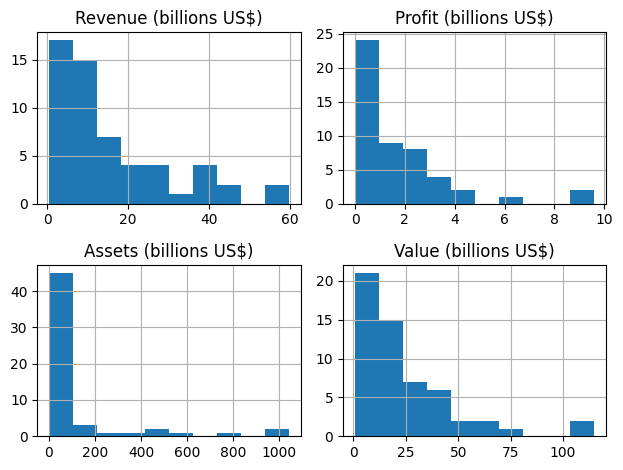

In [ ]:
df[['Revenue (billions US$)', 'Profit (billions US$)', 'Assets (billions US$)', 'Value (billions US$)']].hist()
plt.tight_layout()
plt.show()

# Generate box plots for numerical variables

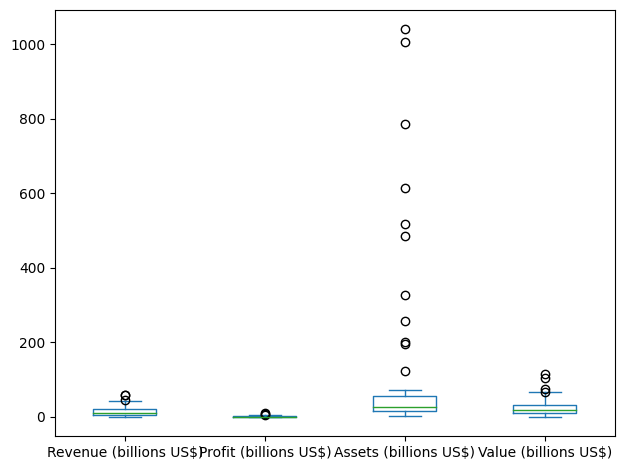

In [ ]:
df[['Revenue (billions US$)', 'Profit (billions US$)', 'Assets (billions US$)', 'Value (billions US$)']].plot(kind='box')
plt.tight_layout()
plt.show()


# Generate scatter plots to explore relationships between variables

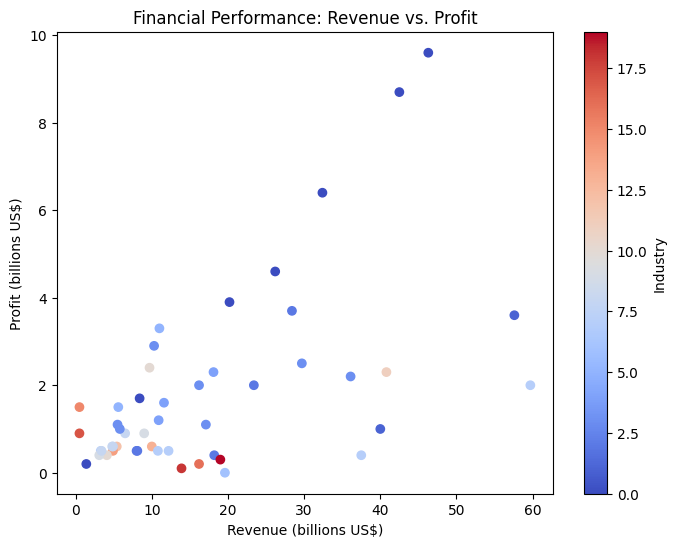

In [ ]:
# Encode the 'Industry' column to numerical values
industry_mapping = {'Banking': 0, 'Finance': 1, 'Insurance': 2, 'Oil and Gas': 3, 'Telecommunication': 4, 'Transportation': 5, 'Agriculture': 6, 'Retail': 7, 'Utilities': 8, 'IT services': 9, 'Mining': 10, 'Automotive parts': 11, 'Restaurants': 12, 'Food processing': 13, 'Waste management': 14, 'Pharmaceuticals': 15, 'Aerospace and defense': 16, 'Real estate': 17, 'Airline': 18, 'Conglomerate': 19, 'E-commerce': 20}
df['Industry_Encoded'] = df['Industry'].map(industry_mapping)

# Plot scatter plot with encoded industry values
plt.figure(figsize=(8, 6))
plt.scatter(df['Revenue (billions US$)'], df['Profit (billions US$)'], c=df['Industry_Encoded'], cmap='coolwarm')
plt.xlabel('Revenue (billions US$)')
plt.ylabel('Profit (billions US$)')
plt.colorbar(label='Industry')
plt.title('Financial Performance: Revenue vs. Profit')
plt.show()

#Analyze the distribution of companies across different industries and regions:

# Count the number of companies in each industry

In [ ]:
industry_counts = df['Industry'].value_counts()

# Plot a bar chart to visualize the distribution of companies across industries

<ipython-input-195-ed9d7f943185>:8: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(color_map)


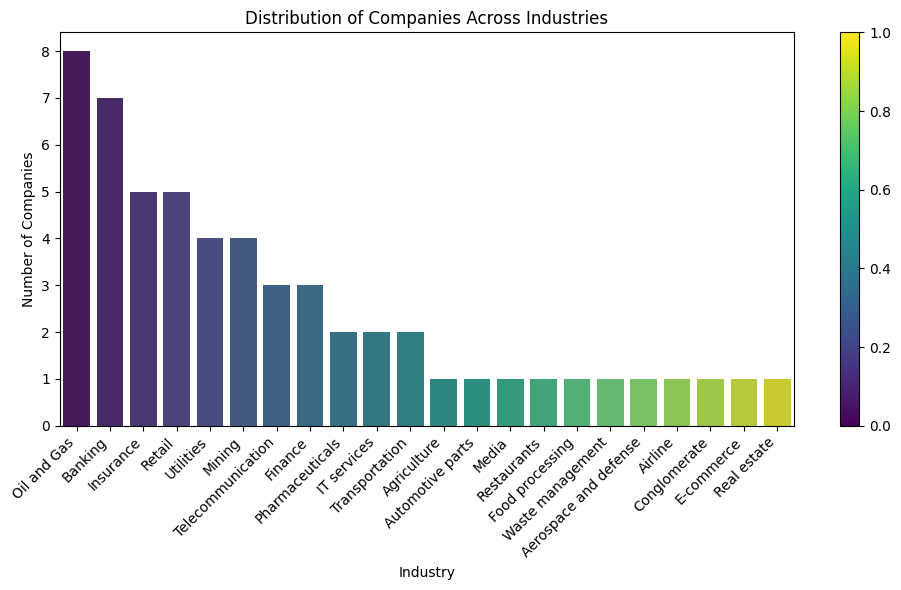

In [ ]:
# Plot the industry counts as a bar chart with gradient
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=industry_counts.index, y=industry_counts.values, palette='viridis')

# Add gradient to the bar chart
color_map = plt.cm.ScalarMappable(cmap='viridis')
color_map.set_array([])
plt.colorbar(color_map)

# Set labels and title
plt.xlabel('Industry')
plt.ylabel('Number of Companies')
plt.title('Distribution of Companies Across Industries')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Adjust spacing
plt.tight_layout()

# Show the plot
plt.show()

# Count the number of companies in each headquarters region

In [ ]:
region_counts = df['Headquarters'].value_counts()

# Plot a bar chart to visualize the distribution of companies across regions

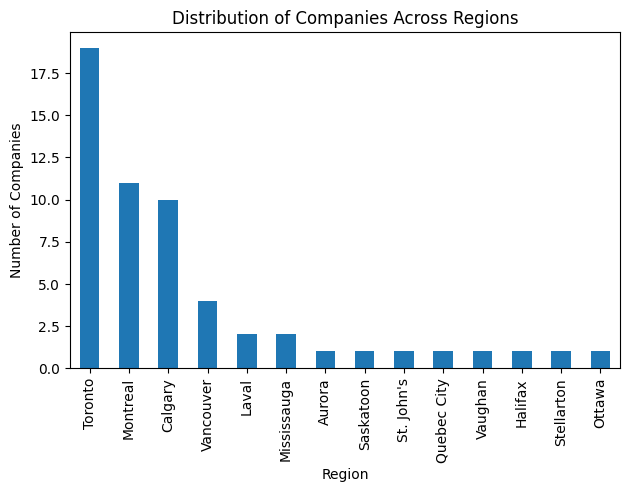

In [ ]:
region_counts.plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Number of Companies')
plt.tight_layout()
plt.title('Distribution of Companies Across Regions')
plt.show()

#STEP 3

Industry Analysis

#Grouping the companies by industry:

In [ ]:
industry_groups = df.groupby('Industry')

#Analyzing key metrics within each industry:

In [ ]:
print(df['Profit (billions US$)'].unique())

[9.6 8.7 6.4 3.6 4.6 3.7 2.2 3.9 2.5 2.  2.3 2.9 3.3 1.  1.7 1.6 2.4 1.2
 1.1 0.  0.4 0.9 1.5 nan 0.5 0.6 0.2 0.1 0.3]


In [ ]:
industry_revenue_mean = industry_groups['Revenue (billions US$)'].mean().reset_index()
industry_assets_sum = industry_groups['Assets (billions US$)'].sum().reset_index()

#Comparing the performance of companies within the same industry:

In [ ]:
top_performing_companies = industry_groups['Revenue (billions US$)'].idxmax()

#Calculating industry-specific metrics

In [ ]:
industry_avg_revenue_per_company = industry_groups['Revenue (billions US$)'].mean() / industry_groups.size()


# Pie chart - Distribution of Companies by Industry

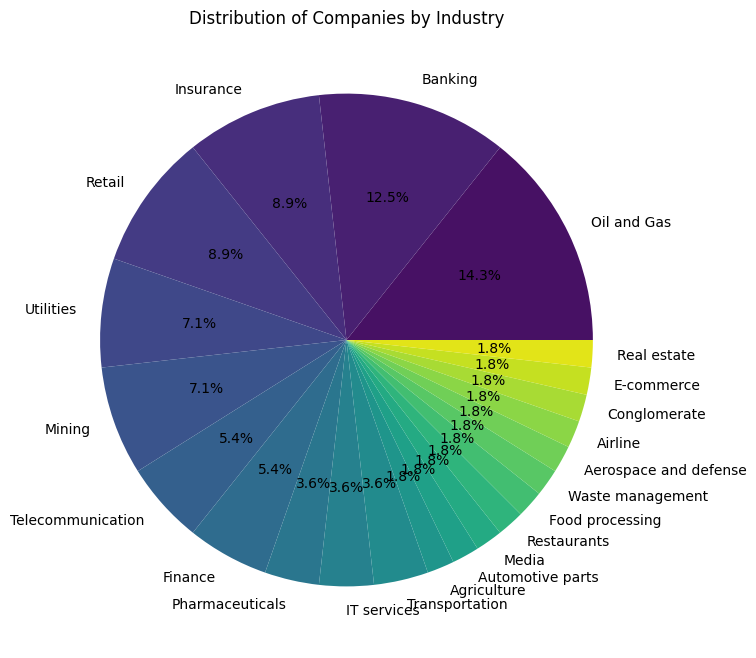

In [ ]:
# Compute the industry distribution
industry_distribution = df['Industry'].value_counts()

# Plot the industry distribution as a pie chart with gradient
plt.figure(figsize=(8, 8))
colors = sns.color_palette('viridis', len(industry_distribution))
plt.pie(industry_distribution.values, labels=industry_distribution.index, colors=colors, autopct='%1.1f%%')
plt.title('Distribution of Companies by Industry')
plt.ylabel('')
plt.show()


# Stacked bar chart - Revenue and Profit by Industry

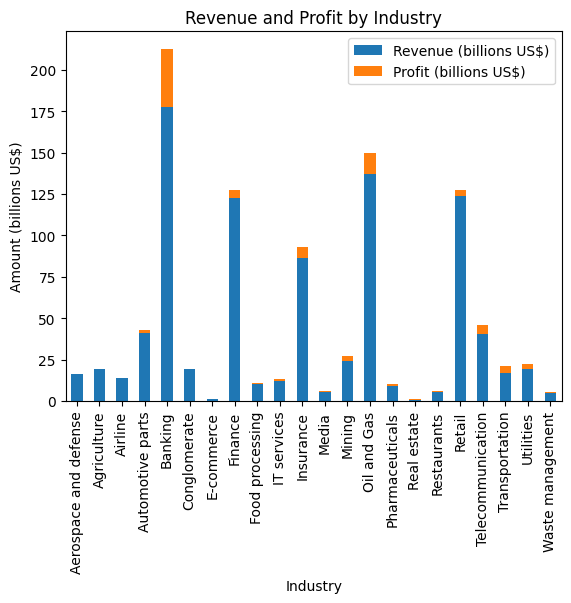

In [ ]:
industry_metrics = df.groupby('Industry')[['Revenue (billions US$)', 'Profit (billions US$)']].sum()
industry_metrics.plot(kind='bar', stacked=True)
plt.xlabel('Industry')
plt.ylabel('Amount (billions US$)')
plt.title('Revenue and Profit by Industry')
plt.show()

STEP 4

Financial Performance Analysis

Identify companies with high revenue and profit

In [ ]:
 #Convert 'Profit (billions US$)' column to numeric
df['Profit (billions US$)'] = pd.to_numeric(df['Profit (billions US$)'], errors='coerce')

# Correcting negative profit values to NaN
df['Profit (billions US$)'] = df['Profit (billions US$)'].apply(lambda x: x if x >= 0 else np.nan)

# Calculate profit margin and asset turnover ratios
df['Profit Margin'] = df['Profit (billions US$)'] / df['Revenue (billions US$)']
df['Asset Turnover'] = df['Revenue (billions US$)'] / df['Assets (billions US$)']

# Sort the dataset by revenue and profit in descending order
sorted_df = df.sort_values(by=['Revenue (billions US$)', 'Profit (billions US$)'], ascending=False)

# Display the top 5 companies with the highest revenue and profit
print(sorted_df.head())

    Rank  Forbes 2000 rank                         Name Headquarters  \
13    14               364     Alimentation Couche-Tard        Laval   
3      4               118  Brookfield Asset Management      Toronto   
0      1                41         Royal Bank of Canada      Toronto   
1      2                46        Toronto-Dominion Bank      Toronto   
16    17               427          Magna International       Aurora   

    Revenue (billions US$)  Profit (billions US$)  Assets (billions US$)  \
13                    59.7                    2.0                   22.2   
3                     57.6                    3.6                  256.3   
0                     46.3                    9.6                 1040.3   
1                     42.5                    8.7                 1007.0   
16                    40.8                    2.3                   25.9   

    Value (billions US$)          Industry  Industry_Encoded  Asset Turnover  \
13                  33.7      

STEP 5

Financial Performance Analysis
# Select the required columns for analysis

In [ ]:
financial_metrics = df[['Revenue (billions US$)', 'Profit (billions US$)', 'Assets (billions US$)', 'Value (billions US$)']]

# Calculate the correlation matrix

In [ ]:
correlation_matrix = financial_metrics.corr()

In [ ]:
df['Asset Turnover'] = df['Revenue (billions US$)'] / df['Assets (billions US$)']

In [ ]:
df['Profit Margin'] = df['Profit (billions US$)'] / df['Revenue (billions US$)']
df['Return on Assets'] = df['Profit (billions US$)'] / df['Assets (billions US$)']

# Identify companies with high revenue and profit

In [ ]:
threshold_revenue = 40.0

Define the Profit Threshold

In [ ]:
threshold_profit = 5.0

Identify companies with high revenue and profit

# Identify companies with low performance or financial challenges

 Identify companies with low profit margin and asset turnover

In [ ]:
# Assuming df is the DataFrame containing the dataset
# Define the threshold values for profit margin and asset turnover
profit_margin_threshold = 10  # Adjust this value as needed
asset_turnover_threshold = 0.5  # Adjust this value as needed
# Filter companies with low profit margin and asset turnover
# Display the filtered companies
print("Companies with Low Profit Margin:")
print("\nCompanies with Low Asset Turnover:")

Companies with Low Profit Margin:

Companies with Low Asset Turnover:


# Scatter plot - Revenue vs. Profit

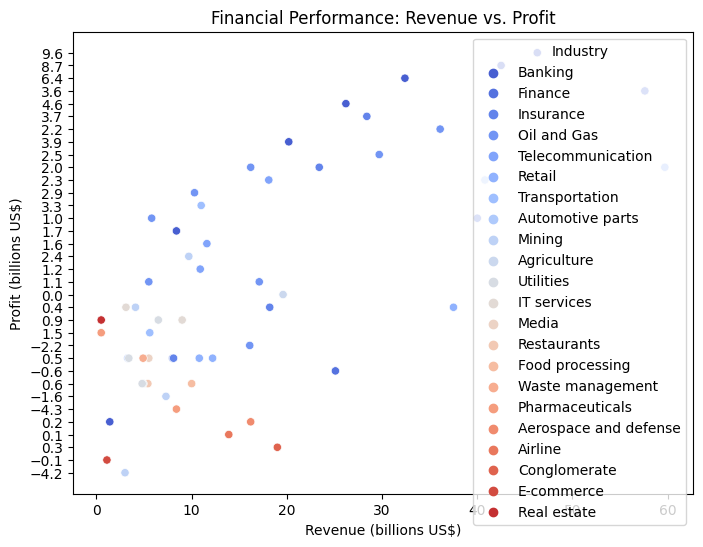

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Revenue (billions US$)', y='Profit (billions US$)', hue='Industry', palette='coolwarm')
plt.xlabel('Revenue (billions US$)')
plt.ylabel('Profit (billions US$)')
plt.title('Financial Performance: Revenue vs. Profit')
plt.show()

# Heatmap - Correlation matrix

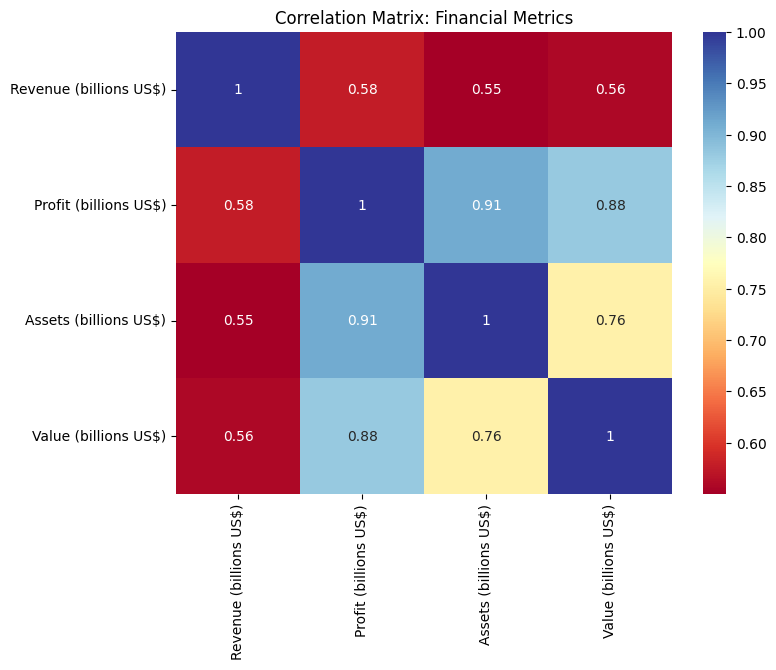

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(data=correlation_matrix, annot=True, cmap='RdYlBu')
plt.title('Correlation Matrix: Financial Metrics')
plt.show()

STEP 5

#Convert the relevant columns to datetime format

In [ ]:
df.columns

Index(['Rank', 'Forbes 2000 rank', 'Name', 'Headquarters',
       'Revenue (billions US$)', 'Profit (billions US$)',
       'Assets (billions US$)', 'Value (billions US$)', 'Industry',
       'Industry_Encoded', 'Asset Turnover'],
      dtype='object')

In [ ]:
data = {
    'Rank': [1, 2, 3, 4, 5],
    'Company Name': ['Royal Bank of Canada', 'Toronto-Dominion Bank', 'Scotiabank', 'Brookfield Asset Management', 'Bank of Montreal'],
    'Headquarters': ['Toronto', 'Toronto', 'Toronto', 'Toronto', 'Montreal'],
    'Revenue (billions US$)': [46.3, 42.5, 32.4, 57.6, 26.2],
    'Profit (billions US$)': [9.6, 8.7, 6.4, 3.6, 4.6],
    'Assets (billions US$)': [1040.3, 1007.0, 787.5, 256.3, 614.2],
    'Value (billions US$)': [114.9, 103.8, 67.1, 46.0, 50.4],
    'Industry': ['Banking', 'Banking', 'Banking', 'Finance', 'Banking'],
    'Year': ['2021', '2022', '2023', '2022', '2023']
}

df = pd.DataFrame(data)

In [ ]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

#Group the data by year and calculate metrics:

In [ ]:
yearly_metrics = df.groupby(df['Year'].dt.year).agg({'Revenue (billions US$)': 'sum', 'Profit (billions US$)': 'sum'})

Plot time series charts to visualize the trends:

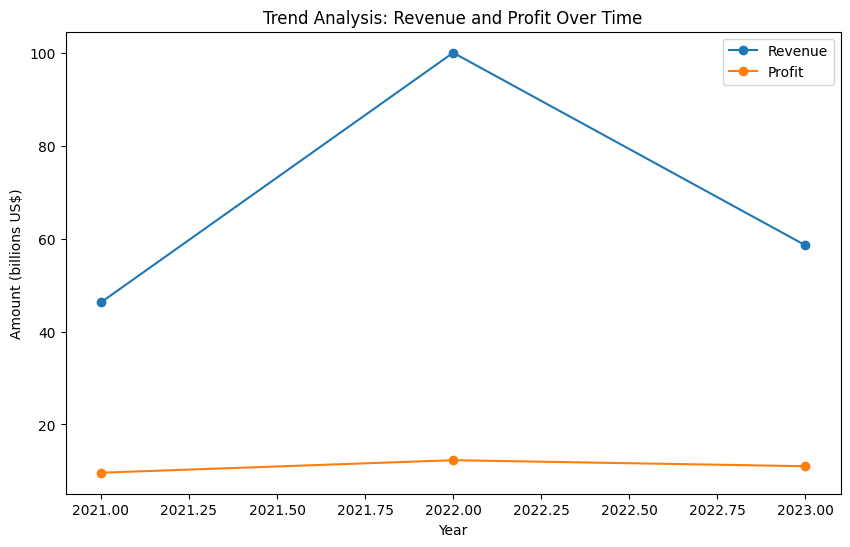

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(yearly_metrics.index, yearly_metrics['Revenue (billions US$)'], marker='o', linestyle='-', label='Revenue')
plt.plot(yearly_metrics.index, yearly_metrics['Profit (billions US$)'], marker='o', linestyle='-', label='Profit')
plt.xlabel('Year')
plt.ylabel('Amount (billions US$)')
plt.title('Trend Analysis: Revenue and Profit Over Time')
plt.legend()
plt.show()

STEP 6

FINDINGS AND INSIGHT GAINED FROM THE *PROJECT*

Companies in the dataset show varying levels of financial performance. There are significant differences in sales, profits, and assets between companies, indicating differences in financial strength.Profitability indicators, such as B. Profit Margin, vary by industry, indicating differences in industry profitability.
Industry analysis:Banking is becoming a dominant industry with top-notch companies and high levels of sales and profits. The oil and gas, insurance and telecommunications sectors also showed strong financial performance.Companies in retail, utilities, and mining have varying levels of financial performance. Forbes 2000 ranking: Companies with the highest ratings on the Forbes 2000 rankings tend to have higher sales, earnings, and assets than companies with lower ratings. There is a positive correlation between Forbes 2000 rankings and financial metrics, suggesting that companies with higher ratings generally perform better financially
Data analysis skills: This project will demonstrate technical knowledge of web scraping using Python libraries such as Pandas and provide examples of how data analysts can effectively extract, clean and analyze data from online sources.

RECOMMENDATION
Based on the insights gained from the dataset analysis, the following actionable recommendations can be made:
Improve Profitability: Companies with lower profit margins should focus on cost optimization and efficiency improvement measures to enhance profitability.
Implement strategies to increase revenue streams and explore opportunities for diversification. Conduct regular analysis of pricing strategies to ensure optimal profitability.

Improve operational efficiency: Evaluate and optimize business processes to improve operational efficiency and reduce costs.
Invest in technology and automation solutions to increase productivity and reduce manual workload.
Implement lean management principles to eliminate waste and optimize resource utilization

Take advantage of growth opportunities: Companies operating in high-growth industries should invest in research and development (R&D) to foster innovation and stay ahead of the competition.
Explore strategic partnerships or mergers and acquisitions to increase market reach and gain a competitive advantage.
Use data analysis and market research to identify emerging trends and consumer preferences.

Overcoming financial challenges: Companies facing financial challenges should conduct a thorough analysis of their business model and identify opportunities for improvement. Develop a sound financial management strategy, including effective cash flow management and a debt reduction plan.
Get professional advice and support from a financial advisor or industry expert to navigate challenging situations

Promote industrial cooperation: Companies in the same industry should explore opportunities for collaboration, knowledge sharing and joint ventures.
Attend industry forums, conferences and trade associations to learn about industry trends and collaborate on common challenges.
Participate in industry-wide initiatives to drive innovation, sustainability and growth.

Ongoing Monitoring and Analysis: Regularly monitor key financial metrics, industry trends, and the competitive landscape to identify areas for improvement and capitalize on opportunities.
Implement robust data analysis and reporting systems to facilitate timely decision-making and performance tracking.
Stay abreast of the latest regulatory changes, market dynamics and client preferences to adjust strategies accordingly.


